#  <ins>Verkehrsuntersuchung</ins>

## Initialisierung

In [21]:
import gzip
import numpy as np
import pandas as pd
from sqlalchemy import create_engine#, text, MetaData, Table, Column, String
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sql_password = 'sqldezi16' # Benutze hier dein MySQL- Passwort
engine = create_engine('mysql+mysqlconnector://root:' + sql_password + '@localhost:3306/verkehrsprojekt')
connection = engine.connect()

## Datenuntersuchung

### PKW- Daten

#### Grafische Darstellung - PKW

In [14]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Stunde des Tages
if False:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	HOUR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

In [15]:
if False:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Uhrzeit')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [18]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Tag des Jahres
if False:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	DAYOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

In [19]:
if False:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Tag des Jahres')
        ax.set_ylabel('Anzahl')
        ax.set_ylim(0)
    
    plt.show()

In [15]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Woche des Jahres
if False:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	WEEKOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

In [16]:
if False:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Woche des Jahres')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [17]:
# Aufsummierte Nutzung gruppiert nach Woche des Jahres, für alle 6 Jahre zusammen
if False:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        GROUP BY
        	WEEKOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})

In [18]:
if False: # Es fehlt noch Achsenbeschriftung
    sns.lineplot(data = df)

In [19]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Wochentag
if False:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	WEEKDAY(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        df.index = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
        dfs.append(df)

In [20]:
if False:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        #ax.set_xlabel('Tag der Woche')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [21]:
# Aufsummierte Nutzung gruppiert nach Wochentag, für alle 6 Jahre zusammen
if False:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        GROUP BY
        	WEEKDAY(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        df.index = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

In [22]:
if False:
    sns.lineplot(data = df)

In [23]:
# Aufsummierte Nutzung gruppiert nach Wochentag, für alle 6 Jahre zusammen
if False:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	pkw_daten
        GROUP BY
        	YEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        df.index = df.index +2018

In [24]:
if False:
    plt.plot(figsize=(8, 6))
    sns.lineplot(data = df).set(title='Anzahl PKW pro Jahr und Messstation', xlabel='Jahr', ylabel='Anzahl')

### Fahrrad- Daten 

#### Grafische Darstellung - Fahrrad

In [28]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Stunde des Tages
if False:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	HOUR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl Fahrräder'})
        dfs.append(df)

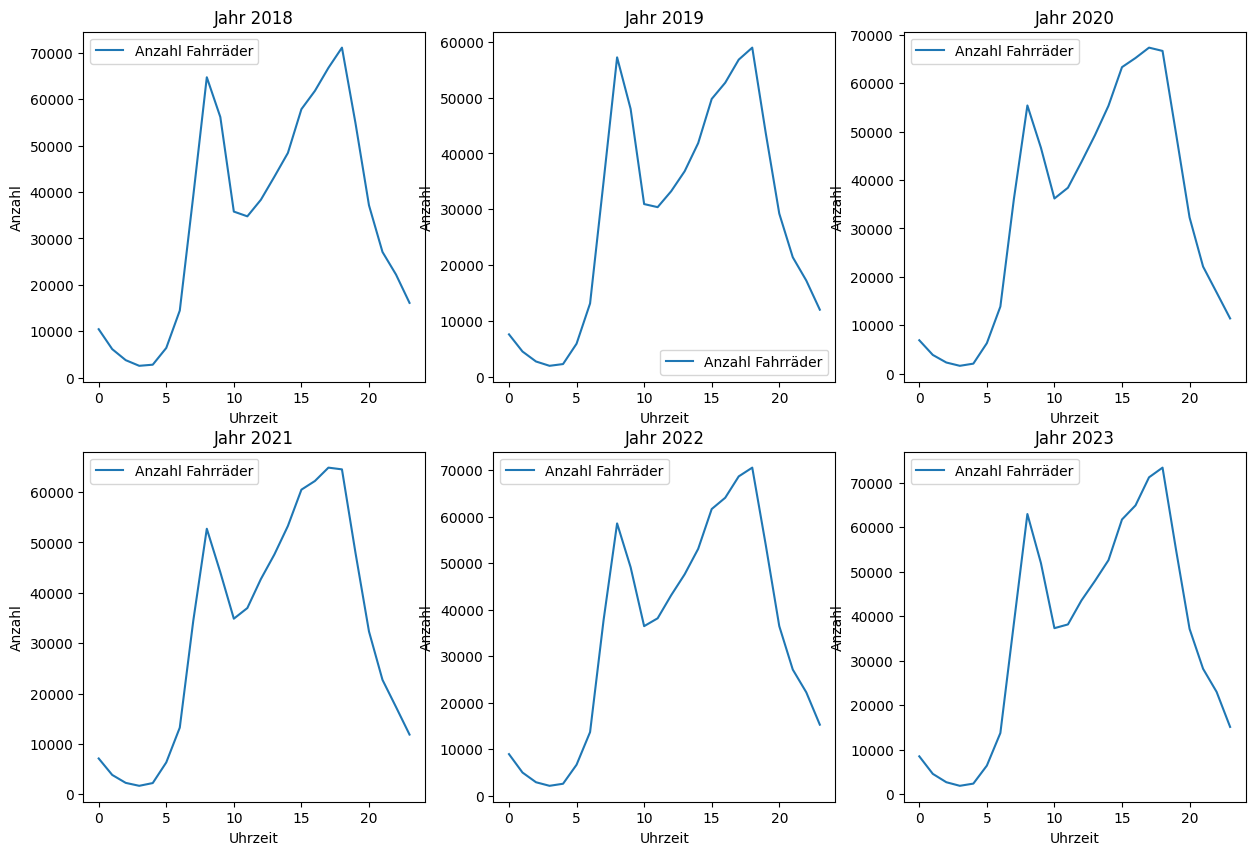

In [29]:
if False:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Uhrzeit')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [30]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Tag des Jahres
if False:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	DAYOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

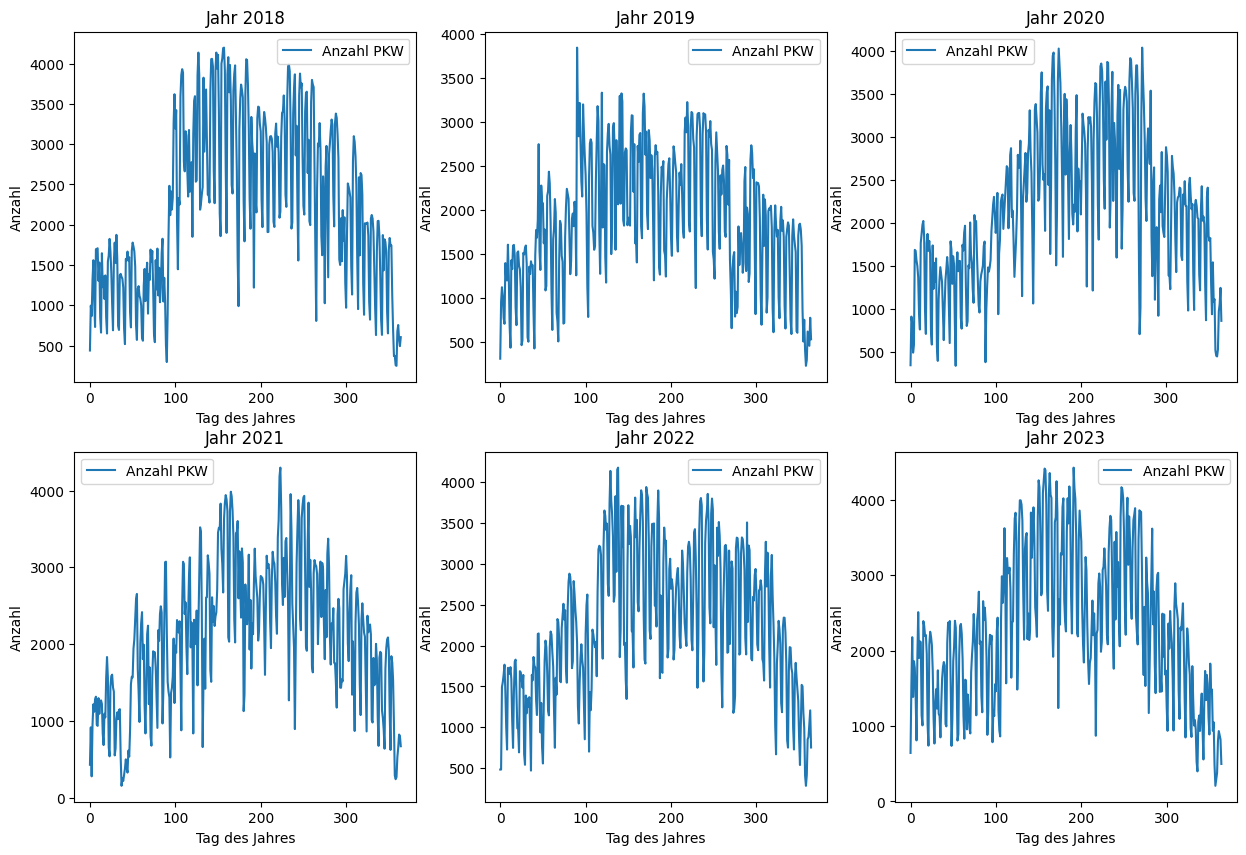

In [31]:
if False:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Tag des Jahres')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [32]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Woche des Jahres
if False:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	WEEKOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        dfs.append(df)

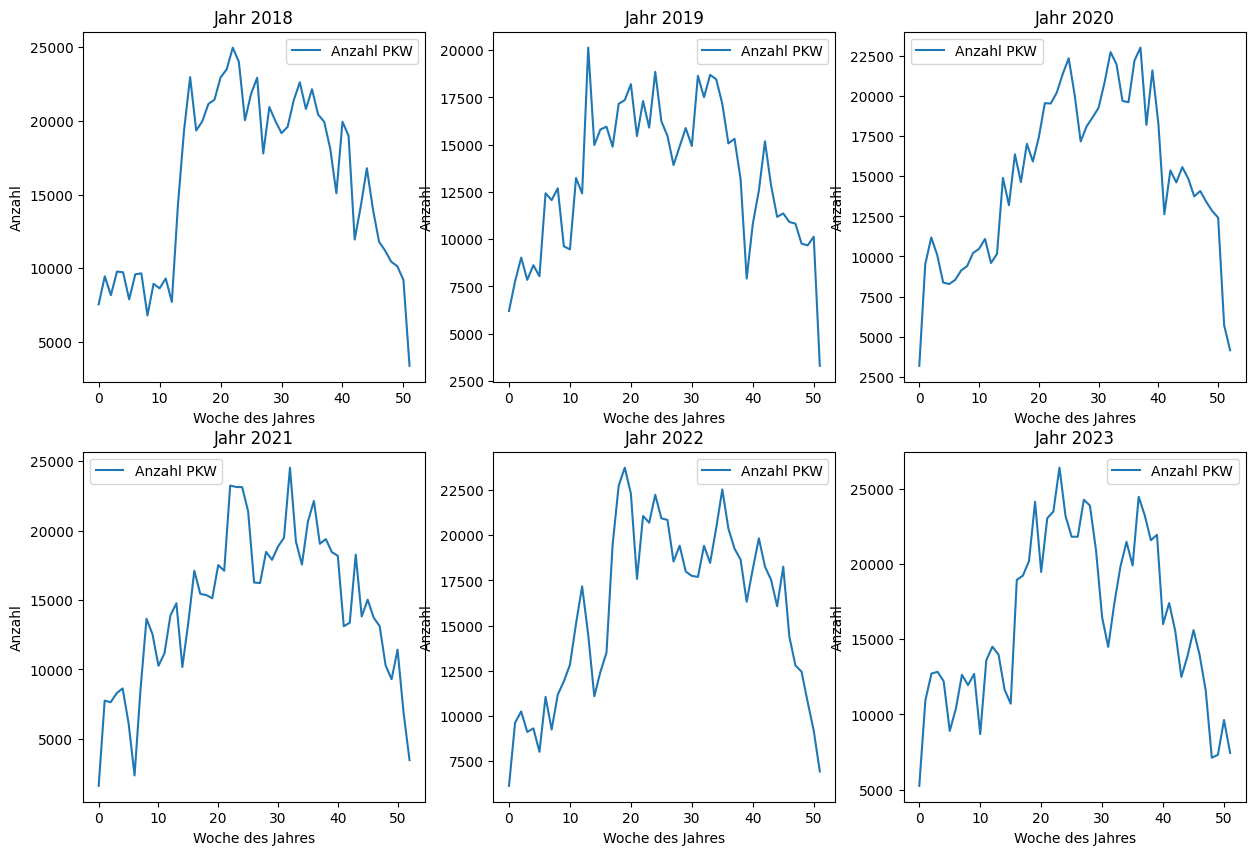

In [33]:
if False:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        ax.set_xlabel('Woche des Jahres')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [34]:
# Aufsummierte Nutzung gruppiert nach Woche des Jahres, für alle 6 Jahre zusammen
if False:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        GROUP BY
        	WEEKOFYEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl Fahrräder'})

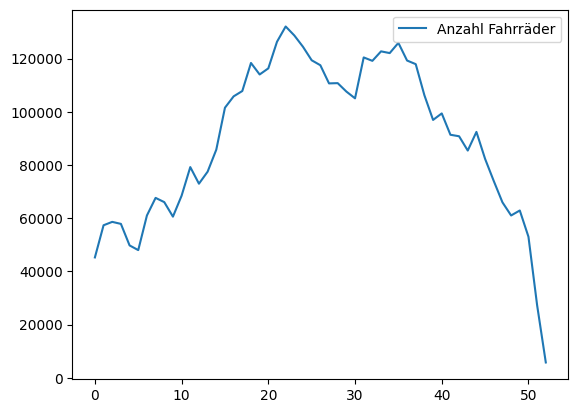

In [35]:
if False: # Es fehlt noch Achsenbeschriftung
    sns.lineplot(data = df)

In [36]:
# Für jedes Jahr: Aufsummierte Nutzung gruppiert nach Wochentag
if False:
    dfs = []
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        WHERE 
        	YEAR(timestamp) = {year}
        GROUP BY
        	WEEKDAY(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl PKW'})
        df.index = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']
        dfs.append(df)

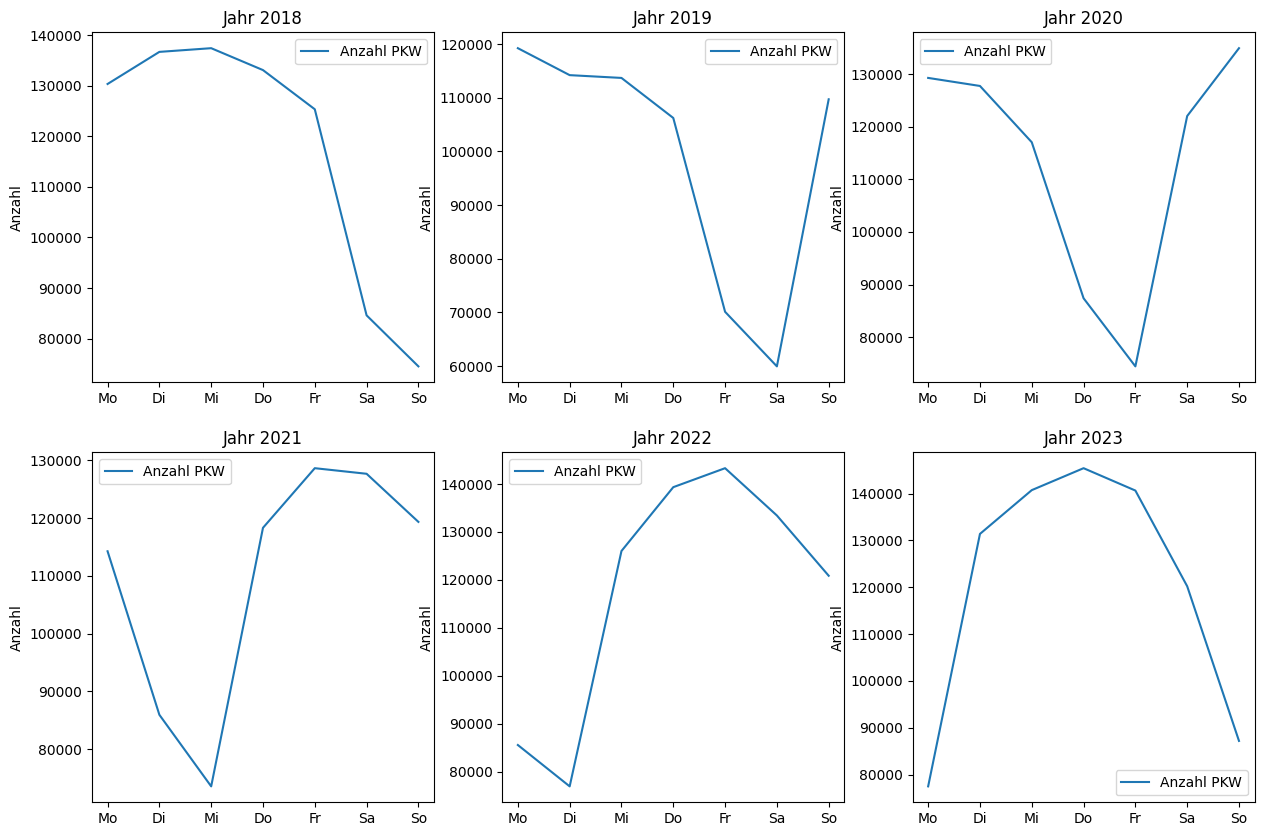

In [37]:
if False:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    for i, ax in zip(range(6), axes.ravel()):
        sns.lineplot(data = dfs[i], ax = ax)
        ax.set_title(f'Jahr {i+2018}')
        #ax.set_xlabel('Tag der Woche')
        ax.set_ylabel('Anzahl')
    
    plt.show()

In [38]:
# Aufsummierte Nutzung gruppiert nach Wochentag, für alle 6 Jahre zusammen
if False:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        GROUP BY
        	WEEKDAY(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl Fahrräder'})
        df.index = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

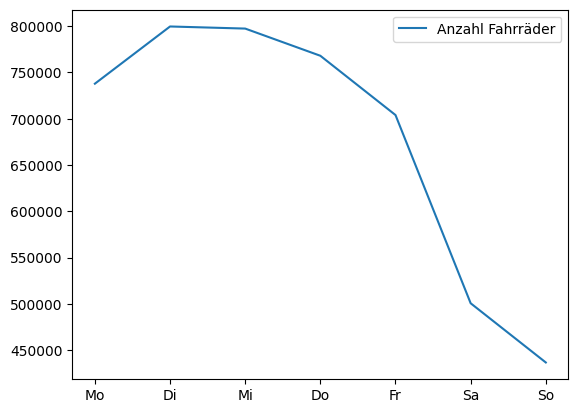

In [39]:
if False:
    sns.lineplot(data = df)

In [40]:
# Aufsummierte Nutzung gruppiert nach Wochentag, für alle 6 Jahre zusammen
if False:
    for year in range(2018, 2023 +1):
        query = f"""
        SELECT  
        	SUM(Durchschnitt)
        FROM 
        	fahrraddaten
        GROUP BY
        	YEAR(timestamp)
        """
        df = pd.read_sql(query,engine)
        df = df.rename(columns = {'SUM(Durchschnitt)':'Anzahl Fahrräder'})
        df.index = df.index +2018

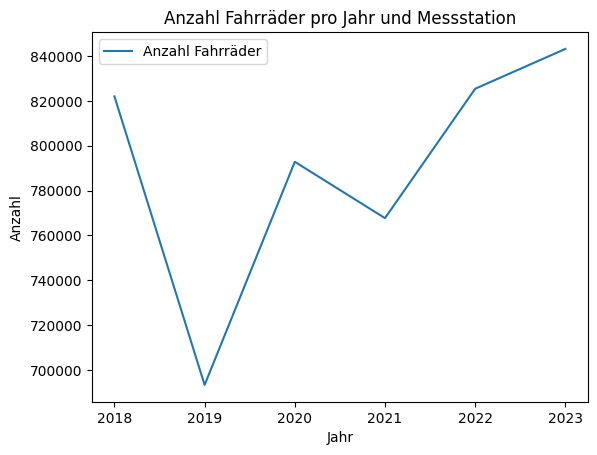

In [41]:
if False:
    plt.plot(figsize=(8, 6))
    sns.lineplot(data = df).set(title='Anzahl Fahrräder pro Jahr und Messstation', xlabel='Jahr', ylabel='Anzahl')

In [220]:
if False:
    begin = time()
    # SVR-Modell initialisieren (mit RBF-Kernel)
    svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    
    # Modell trainieren
    svr.fit(X_train, y_train)
    
    # Vorhersagen treffen
    y_pred = svr.predict(X_test)
    
    # Performance evaluieren
    mse = mean_squared_error(y_test, y_pred)
    sd = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    end = time()
    print(end-begin)
    print(f"Standard Deviation: {sd}")
    print(f"R^2 Score: {r2}")

C:\Users\Efi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


230.98116445541382
Standard Deviation: 42.39785361252609
R^2 Score: 0.746344304730622


In [221]:
if False:
    begin = time()
    gbr = GradientBoostingRegressor(
        n_estimators=100,     # Anzahl der Bäume
        learning_rate=0.1,    # Lernrate (Schrittgröße)
        max_depth=3,          # Maximale Tiefe der Bäume
        random_state=42
    )
    
    # Modell trainieren
    gbr.fit(X_train, y_train)
    
    # Vorhersagen treffen
    y_pred = gbr.predict(X_test)
    
    # Performance evaluieren
    mse = mean_squared_error(y_test, y_pred)
    sd = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    end = time()
    print(end-begin)
    print(f"Standardabweichung: {sd}")
    print(f"R^2 Score: {r2}")

C:\Users\Efi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


3.39844012260437
Standardabweichung: 45.505475372749416
R^2 Score: 0.7077973252935614


In [259]:
y.shape

(51886, 1)

In [260]:
X.shape

(51886, 47)

In [257]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.families.links import logit
from statsmodels.genmod.families import Binomial

model = smf.glm('y ~ X', data=data, family=Binomial(link=logit()))
results = model.fit()

# Ergebnisse anzeigen
print(results.summary())

C:\Users\Efi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


PatsyError: Number of rows mismatch between data argument and y (740 versus 51886)
    y ~ X
    ^

In [ ]:
from openpyxl import load_workbook

In [ ]:
# Lade die Excel-Datei mit openpyxl
file_path = 'Fahrrad_Stamm_Messdaten.xlsx'
workbook = load_workbook(file_path)
sheet = workbook['Jahresdatei 2019']

color_matrix = []

# Iteriere über alle Zeilen und Spalten im Arbeitsblatt
for row in sheet.iter_rows():
    row_colors = []
    for cell in row:
        fill = cell.fill
        # Überprüfe, ob die Zelle eine Hintergrundfarbe hat
        if fill.start_color.index != '00000000':  # '00000000' bedeutet keine Farbe (transparent)
            row_colors.append(True)
        else:
            row_colors.append(False)
    color_matrix.append(row_colors)

# Erstelle ein pandas DataFrame aus der Farbinformation
df_colors = pd.DataFrame(color_matrix)

# Gib die extrahierten Farben aus
#print(colors)

In [ ]:
df_colors

In [ ]:
df_unscaled.head(2)

### Visualisierung Auto/Fahrrad Mit den bisherigen Fahrrad- Daten

In [ ]:
day_names = ['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So']

In [ ]:
df_unscaled['dayofweek'] = df_unscaled['dayofweek'].apply(lambda n: day_names[n])

In [ ]:
df_dayofweek = df_unscaled[['hour', 'dayofweek', 'Anzahl PKW', 'Anzahl Fahrräder']]

In [ ]:
# Pivot table: rows = day, columns = hour, values = mean users
pivot = df_dayofweek.pivot_table(values='Anzahl PKW', index='dayofweek', columns='hour', aggfunc='mean')
pivot = pivot.reindex(day_names) #Aus irgend einem Grund wurden die Tagesnamen verdreht

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f", vmin = 0)
plt.title('Durchschnittliche Anzahl PKW pro Messstation')
plt.xlabel('Stunde des Tages')
plt.ylabel('')
plt.show()

In [ ]:
# Pivot table: rows = day, columns = hour, values = mean users
pivot = df_dayofweek.pivot_table(values='Anzahl Fahrräder', index='dayofweek', columns='hour', aggfunc='mean')
pivot = pivot.reindex(day_names) #Aus irgend einem Grund wurden die Tagesnamen verdreht

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f", vmin = 0)
plt.title('Durchschnittliche Anzahl Fahrräder pro Messstation')
plt.xlabel('Stunde des Tages')
plt.ylabel('')
plt.show()

In [ ]:
df_yearly = df_unscaled[['Anzahl PKW', 'Anzahl Fahrräder']]

In [ ]:
df_yearly['year'] = df_yearly.index.year

In [ ]:
df_yearly = df_yearly.groupby('year').sum()

In [ ]:
df_yearly

In [ ]:
# Plot erstellen
fig, ax1 = plt.subplots(figsize=(8, 6))

# Erste y-Achse (für Auto)
ax1.plot(df_yearly.index, df_yearly['Anzahl PKW']/10000, color='blue', label='Auto')
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Auto')
ax1.tick_params(axis='y')
ax1.set_ylim(0)

# Zweite y-Achse (für Fahrrad)
ax2 = ax1.twinx()
ax2.plot(df_yearly.index, df_yearly['Anzahl Fahrräder']/10000, color='orange', label='Fahrrad')
ax2.set_ylabel('Fahrrad')
ax2.tick_params(axis='y')
ax2.set_ylim(0)

# Titel und Legenden hinzufügen
fig.suptitle('Insgesamt gezählte Fahrzeuge pro Jahr und Messstation')
#fig.subtitle('in 10.000')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

fig.text(0.5, 1-0.078, "in 10.000", ha='center', fontsize=10)  # Untertitel
plt.show()

In [ ]:
df_weekofyear = df_unscaled[['Anzahl PKW', 'Anzahl Fahrräder']]

In [ ]:
df_weekofyear['weekofyear'] = df_weekofyear.index.isocalendar().week

In [ ]:
df_weekofyear = df_weekofyear.groupby('weekofyear').mean()

In [ ]:
# Plot erstellen
fig, ax1 = plt.subplots(figsize=(8, 6))

# Erste y-Achse (für Auto)
ax1.plot(df_weekofyear.index, df_weekofyear['Anzahl PKW'], color='blue', label='Auto')
ax1.set_xlabel('Kalenderwoche')
ax1.set_ylabel('Auto')
ax1.tick_params(axis='y')
ax1.set_ylim(0)

# Zweite y-Achse (für Fahrrad)
ax2 = ax1.twinx()
ax2.plot(df_weekofyear.index, df_weekofyear['Anzahl Fahrräder'], color='orange', label='Fahrrad')
ax2.set_ylabel('Fahrrad')
ax2.tick_params(axis='y')
ax2.set_ylim(0)

# Titel und Legenden hinzufügen
fig.suptitle('Insgesamt gezählte Fahrzeuge pro Jahr und Messstation')
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

plt.show()

In [ ]:
df_holiday = df_unscaled[['Anzahl PKW', 'Anzahl Fahrräder', 'dayofweek', 'hour', 'is_holiday']]

In [ ]:
df_holiday['is_holiday'] = (df_holiday['is_holiday'] == 1) | (df_holiday['dayofweek'] == 'So')
df_holiday['is_holiday'] = df_holiday['is_holiday'].astype(int)

In [ ]:
Tageszeitkategorie = [ 'nachts', # 0
                      'nachts', # 1
                      'nachts', # 2
                      'nachts', # 3
                      'nachts', # 4
                      'nachts', # 5
                      'morgens', # 6
                      'morgens', # 7
                      'morgens', # 8
                      'vormittags', # 9
                      'vormittags', # 10
                      'mittags', # 11
                      'mittags', # 12
                      'mittags', # 13
                      'nachmittags', # 14
                      'nachmittags', # 15
                      'nachmittags', # 16
                      'nachmittags', # 17
                      'abends', # 18
                      'abends', # 19
                      'abends', # 20
                      'abends', # 21
                      'nachts', # 22
                      'nachts', # 23
                     ]

In [ ]:
df_holiday['Tagesabschnitt'] = df_holiday['hour'].apply(lambda n: Tageszeitkategorie[n])

In [ ]:
df_holiday['is_holiday'] = df_holiday['is_holiday'].apply(lambda n: 'ja' if n== 1 else 'nein')

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tagesabschnitt', y='Anzahl PKW', hue='is_holiday', data=df_holiday)
plt.title('Durchschnittliche Anzahl PKWs nach Tageszeit')
plt.xlabel('')
plt.ylabel('Anzahl pro Messstation')
plt.legend(title='Feiertag')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tagesabschnitt', y='Anzahl Fahrräder', hue='is_holiday', data=df_holiday)
plt.title('Durchschnittliche Anzahl PKWs nach Tageszeit')
plt.xlabel('')
plt.ylabel('Anzahl pro Messstation')
plt.legend(title='Feiertag')
plt.show()